<a href="https://colab.research.google.com/github/shreyabhadwal/NBA-Points-Scored-Prediction-/blob/main/NBA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd      #Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
nba = pd.read_csv('https://raw.githubusercontent.com/shreyabhadwal/NBA-Points-Scored-Prediction-/main/nba_2013.csv')   #Loading the dataset
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


Column definitions are provided at [NBA's offiical website](https://www.nba.com/stats/help/glossary/#fta). <br>

These are summarized through the self-made data dictionary below:

In [4]:
pd.read_csv('https://raw.githubusercontent.com/shreyabhadwal/NBA-Points-Scored-Prediction-/main/data_dict_nba.csv')  

,column_name,description
0,player,Player Name
1,pos,Position
2,age,Age
3,bref_team_id,Player's Team
4,g,Number of Games Played
5,gs,Number of Games Played as a Starting Lineup
6,mp,Minutes Played
7,fg,Field Goals
8,fga,Field Goal Attempts
9,fg.,Field Goal Percentage


# Exploratory Data Analysis

In [44]:
print("Number of rows: ", nba.shape[0])
print("Number of columns: ", nba.shape[1]) 

Number of rows:  481
Number of columns:  31


In [45]:
nba.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [46]:
nba.describe().T  

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.509356,4.198265,19.0,23.000000,26.000000,29.000000,39.0
g,481.0,53.253638,25.322711,1.0,32.000000,61.000000,76.000000,83.0
gs,481.0,25.571726,29.658465,0.0,0.000000,10.000000,54.000000,82.0
mp,481.0,1237.386694,897.258840,1.0,388.000000,1141.000000,2016.000000,3122.0
fg,481.0,192.881497,171.832793,0.0,47.000000,146.000000,307.000000,849.0
fga,481.0,424.463617,368.850833,0.0,110.000000,332.000000,672.000000,1688.0
fg.,479.0,0.436436,0.098672,0.0,0.400500,0.438000,0.479500,1.0
x3p,481.0,39.613306,50.855639,0.0,0.000000,16.000000,68.000000,261.0
x3pa,481.0,110.130977,132.751732,0.0,3.000000,48.000000,193.000000,615.0
x3p.,414.0,0.285111,0.157633,0.0,0.234355,0.330976,0.375000,1.0


In [47]:
nba.nlargest(50,"pts").head()  #Displaying the top 5 points scorers.

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
133,Kevin Durant,SF,25,OKC,81,81,3122,849,1688,0.503,192,491,0.391039,657,1197,0.548872,0.560,703,805,0.873,58,540,598,445,103,59,285,174,2593,2013-2014,2013
17,Carmelo Anthony,PF,29,NYK,77,77,2982,743,1643,0.452,167,415,0.402410,576,1228,0.469055,0.503,459,541,0.848,145,477,622,242,95,51,198,224,2112,2013-2014,2013
225,LeBron James,PF,29,MIA,77,77,2902,767,1353,0.567,116,306,0.379085,651,1047,0.621777,0.610,439,585,0.750,81,452,533,488,121,26,270,126,2089,2013-2014,2013
277,Kevin Love,PF,25,MIN,77,77,2797,650,1421,0.457,190,505,0.376238,460,916,0.502183,0.524,520,633,0.821,224,739,963,341,59,35,196,136,2010,2013-2014,2013
179,Blake Griffin,PF,24,LAC,80,80,2863,718,1359,0.528,12,44,0.272727,706,1315,0.536882,0.533,482,674,0.715,192,565,757,309,92,51,224,265,1930,2013-2014,2013


In [48]:
nba.sort_values("pts",ascending=True).head()   #Displaying the bottom 5 points scorers.

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
240,Darius Johnson-Odom,SG,24,PHI,3,0,15,0,7,0.0,0,3,0.0,0,4,0.0,0.0,0,2,0.0,0,2,2,1,1,0,2,3,0,2013-2014,2013
351,Dexter Pittman,C,25,ATL,2,0,3,0,1,0.0,0,0,NaN,0,1,0.0,0.0,0,2,0.0,3,0,3,0,0,0,0,0,0,2013-2014,2013
90,Josh Childress,SF,30,NOP,4,0,24,0,0,NaN,0,0,NaN,0,0,NaN,NaN,0,0,NaN,0,3,3,2,1,0,1,1,0,2013-2014,2013
219,Royal Ivey,SG,32,OKC,2,0,5,0,2,0.0,0,1,0.0,0,1,0.0,0.0,0,0,NaN,0,1,1,0,0,0,0,1,0,2013-2014,2013
460,D.J. White,PF,27,CHA,2,0,10,0,1,0.0,0,0,NaN,0,1,0.0,0.0,0,0,NaN,0,2,2,0,1,0,0,1,0,2013-2014,2013


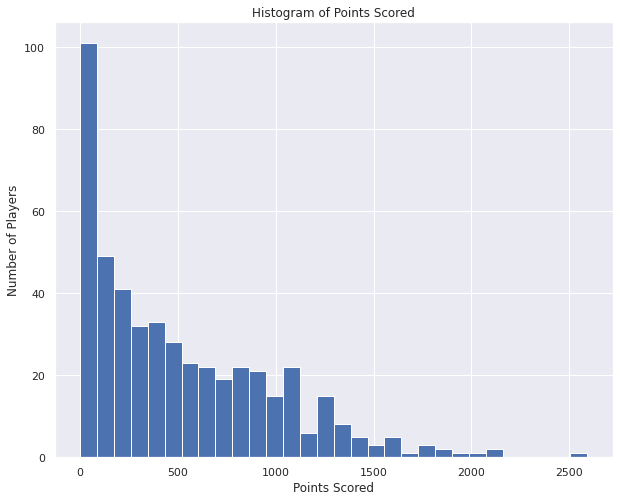

In [49]:
fig, ax = plt.subplots(figsize = (10,8))   #Plotting a histogram of points scored
nba.pts.hist(ax = ax, bins = 30)
plt.title('Histogram of Points Scored')
plt.xlabel('Points Scored')
plt.ylabel('Number of Players')
plt.show()

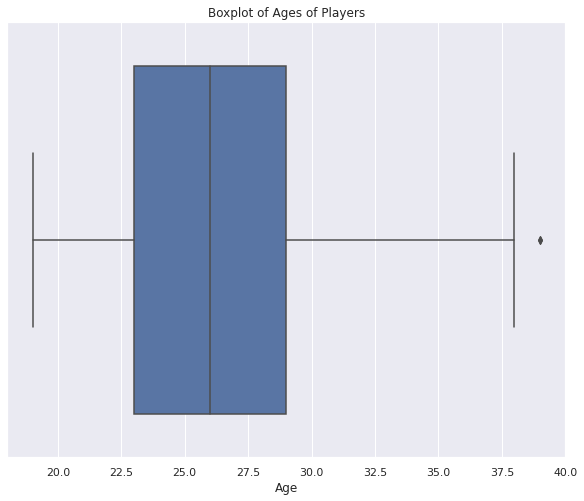

In [50]:
fig, ax = plt.subplots(figsize = (10,8))    #Plotting boxplot of ages of players
sns.boxplot(x = nba.age)
plt.xlabel('Age')
plt.title('Boxplot of Ages of Players')
plt.show()

The pair plots for 3 variables have been plotted below to examine the relationship between them. <br>
The 3 variables are:<br>
'trb' : Total Rebounds <br>
'x3p' : 3 Point Field Goals <br>
'pts' : Points <br> 

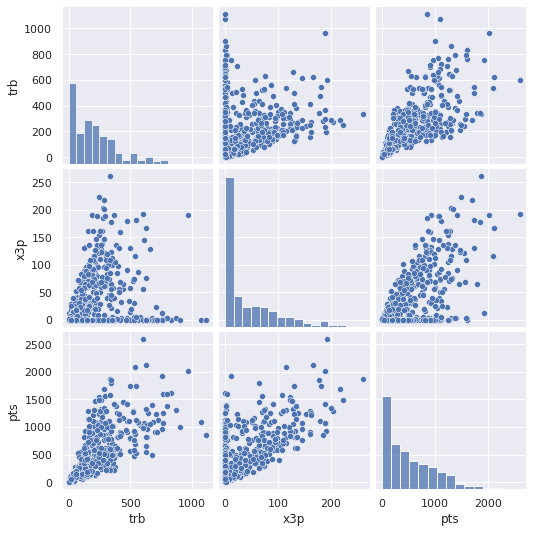

In [51]:
sns.pairplot(nba[['trb','x3p','pts']])

From the graphs above, Total Rebounds ('trb') seem to show a positve correlation with the Points scored ('pts'), with Points increasing with an increase of Total Rebounds.<br> 
Similary, 3 Point Field Goals ('x3p') also seem to show a positive correlation with the Points Scored ('pts'). <br>
The relationship between 3 Point Field Goals ('x3p') and Total rebounds ('trb') seems to be more complex, with some data points lying parallel to the X-axis. 

The heat map for 3 variables has been plotted below to examine the relationship between them. <br>
The 3 variables are:<br>
'ast' : Assists <br>
'pf' : Personal Fouls <br>
'pts' : Points <br> 

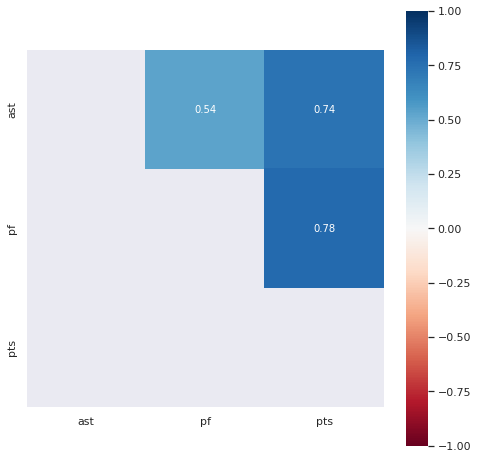

In [52]:
fig,ax= plt.subplots(figsize = (8,8))
corr = nba[['ast','pf','pts']].corr()  #Getting Pearson Correlation 
mask = np.zeros_like(corr,dtype=np.bool) #Done to avoid repetion of values in lower triangle
mask[np.tril_indices_from(mask)] = True
sns.heatmap(
    corr,
    mask = mask,
    fmt = '.2f',
    vmin = -1,
    vmax = 1, 
    annot = True,
    ax =ax,
    cmap = 'RdBu',
    square = True, 
)

From the graphs above, Assists ('ast') seem to show a relatively healthy positve correlation with the Points scored ('pts'). <br> 
Similary, Personal Fouls ('pf') also seems to show a positive correlation with Points scored ('pts'). <br>
While there seems to be a positive correlation between Personal Fouls ('pf') and number of Assists ('ast'), it's weaker than the correlations discussed above. 

In [53]:
nba.describe(include=[np.object]).T   #Describing Categorical Data

,count,unique,top,freq
player,481,481,Isaiah Thomas,1
pos,481,7,SG,109
bref_team_id,481,31,TOT,63
season,481,1,2013-2014,481


No null values in the categorical variables.

In [54]:
nba.pos.value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

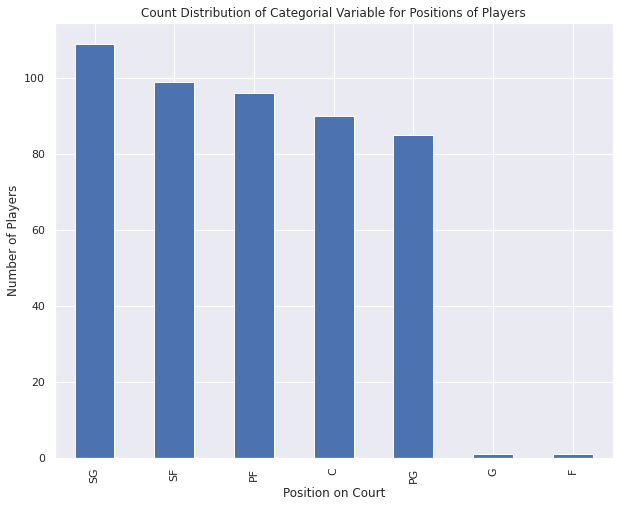

In [55]:
fig,ax= plt.subplots(figsize = (10,8))  #Plotting a bar chart of position of players and their frequency
nba.pos.value_counts().plot.bar()
plt.title('Count Distribution of Categorial Variable for Positions of Players')
plt.xlabel('Position on Court')
plt.ylabel('Number of Players')
plt.show()

In [56]:
nba.bref_team_id.value_counts().head()

TOT    63
NOP    18
OKC    17
LAL    16
LAC    16
Name: bref_team_id, dtype: int64

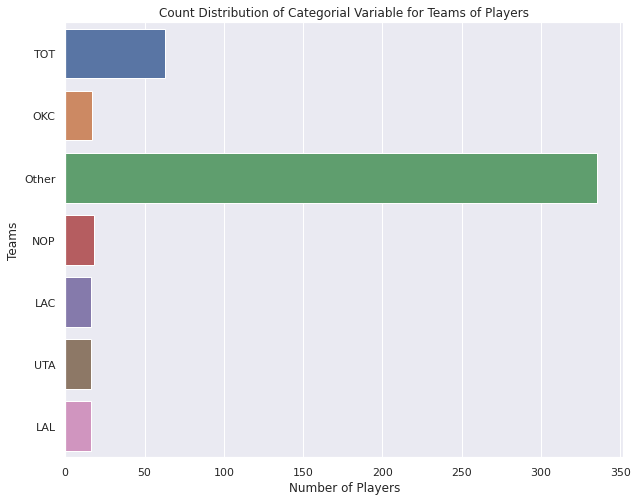

In [57]:
fig,ax= plt.subplots(figsize = (10,8))     #Plotting bar chart of teams and the number of players in it
top_team = nba.bref_team_id.value_counts().index[:6]
sns.set_theme(style="darkgrid")
sns.countplot(y='bref_team_id', data = (nba.assign 
                                        (bref_team_id=nba.bref_team_id.where(
                                            nba.bref_team_id.isin(top_team),
                                            "Other")
                                        )
                                        ),
      
).set_title('Count Distribution of Categorial Variable for Teams of Players')
plt.xlabel('Number of Players')
plt.ylabel('Teams')
plt.show()

In [58]:
# Compare Points to Position
mask = nba.pos.isin(["C","PF","PG","SF","SG"])
nba[mask].groupby('pos').pts.agg(
    ["mean","std"]
)

,mean,std
pos,,
C,425.066667,406.400306
PF,571.031250,512.325687
PG,611.141176,484.922261
SF,493.989899,454.734269
SG,500.357798,473.066269


Din't take F and G as they're only one sample each.

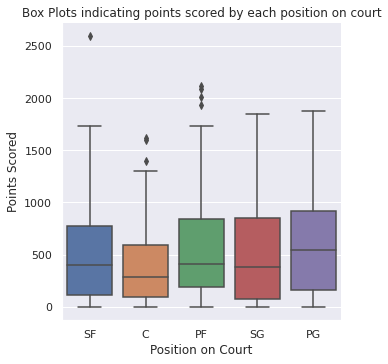

In [59]:
g = sns.catplot( x = 'pos', y = 'pts', data = nba[mask],kind='box')
plt.xlabel('Position on Court')
plt.ylabel('Points Scored')
plt.title('Box Plots indicating points scored by each position on court')
plt.show()

# KNN Application

In [60]:
print(nba.isnull().sum()) #Finding out number of NaN values in each variable

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64


In [61]:
nba.fillna(0,inplace=True)
print(nba.isnull().sum()) #Replacing NaN values with 0 (as in all cases, 0 is minimum value)

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64


In [62]:
nba_split = nba.iloc[:,1:29] #Removing name
nba_split = nba_split.drop(["bref_team_id","pos"], axis = 1) #Dropping categorical variables 
nba_split.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.000000,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.000000,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328


In [63]:
training_data, testing_data = train_test_split(nba_split, test_size=0.2, random_state=25) #Spliiting data

x_train = training_data.drop(["pts"],axis =1) #Dropping variable that needs to be predicted
y_train = training_data["pts"] 

x_test = testing_data.drop(["pts"],axis =1)
y_test = testing_data["pts"]

In [64]:
sc = StandardScaler()    #Standardization (Removing the mean and scaling to unit variance)

sc.fit(x_train)
x_train = sc.transform(x_train)

sc.fit(x_test)
x_test = sc.transform(x_test)

In [65]:
knn= KNeighborsRegressor(n_neighbors = 7)   #Through experimentation, best results at k = 7
knn.fit(x_train,y_train)

print(knn.score(x_test, y_test))

0.9722970022527161


# KNN with PCA Application

In [66]:
x_nba_split = nba_split.drop(["pts"], axis = 1) #Removing the y variable
sc = StandardScaler()     #Standardization (Removing the mean and scaling to unit variance)
sc.fit(x_nba_split)

StandardScaler()

In [67]:
scaled_data = sc.transform(x_nba_split)
scaled_data

array([[-0.83677633,  0.3852869 , -0.86310432, ...,  0.0614737 ,
        -0.66834514,  0.22675114],
       [-1.55210112,  1.09685132, -0.1880585 , ...,  1.06655521,
        -0.0137745 ,  1.36535809],
       [ 0.11699006, -0.01002666, -0.45807683, ...,  0.38569354,
        -0.5246589 ,  0.02995488],
       ...,
       [-0.35989314,  1.01778861,  1.76957436, ...,  0.38569354,
         1.48694846,  1.50592685],
       [-1.31365952,  1.13638268, -0.76184744, ...,  0.54780346,
         0.24166771,  0.90148119],
       [-0.59833473,  0.6620064 , -0.5593337 , ...,  0.45053751,
        -0.18939101,  0.43760428]])

In [68]:
pca = PCA(n_components=5) #Reducing variables required to represent data to 5

In [69]:
pca.fit(scaled_data)  

PCA(n_components=5)

In [70]:
nba_pca = pca.transform(scaled_data)

In [71]:
print("Original Data Dimensions: ", scaled_data.shape)
print("Reduced Data Dimensions: ", nba_pca.shape)

Original Data Dimensions:  (481, 25)
Reduced Data Dimensions:  (481, 5)


In [72]:
nba_pca_df = pd.DataFrame(nba_pca) #Converting numpy array back to dataframe
nba_pca_df.shape

(481, 5)

In [73]:
pts = nba["pts"] #Getting the y variable 

In [74]:
red_data = nba_pca_df.join(pts) #Joining the reduced dataset and y variable to 
                                #get dimensionally reduced dataset 
red_data

,0,1,2,3,4,pts
0,-1.671562,1.193072,0.380139,-0.471828,-1.123315,171
1,0.196648,2.746247,-0.394953,-0.963106,-1.327329,265
2,-0.625379,2.378889,0.058923,0.025790,0.264709,362
3,4.442367,-2.277996,0.479661,-0.142215,0.994882,1330
4,-0.175583,2.527109,0.646110,-0.155768,-0.576032,328
...,...,...,...,...,...,...
476,3.036769,-0.764969,-0.788900,-2.205161,0.620254,939
477,2.498802,-2.205227,0.853383,-0.011660,0.279216,1144
478,6.775873,-0.525392,-0.822373,-0.220052,-0.085500,1417
479,0.834041,1.649527,-1.475490,-1.058070,-0.960586,490


In [75]:
training_data_red, testing_data_red = train_test_split(red_data, test_size=0.2, random_state=25) #Splitting again

x_train = training_data_red.drop(["pts"],axis =1)
y_train = training_data_red["pts"]

x_test = testing_data_red.drop(["pts"],axis =1)
y_test = testing_data_red["pts"]

In [76]:
knn= KNeighborsRegressor(n_neighbors=6)  #Feeding reduced dataset to classifier 
knn.fit(x_train,y_train)                 # K selected through experimnetation again

print(knn.score(x_test, y_test))

0.9641082001768807


As seen, a trade off for dimensionally reduced dataset is reduced accuracy. <br>
Howver, the accuracy doesn't drop drastically. <br> 
The accuracy without PCA comes out to be about 97.2% and the accuracy with PCA comes out to be about 96.4%